## Clasification Data Model for Census Bureau DataBase
### Author - Nevena Mitic

### Dataset 
The dataset was extracted from the census bureu database found at http://www.census.gov/ftp/pub/DES/www/welcome.html

### Description of Variables
The dataset contains 32561 observations of 14 variables:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Problem Statement

Prediction task is to determine whether a person makes over 50K a year. 

## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import *
import matplotlib.pyplot as plt
import matplotlib

## Define functions

In [2]:
# Function for outlier replacement
def account_outliers(df, columnName):
    LimitHi = np.mean(df.loc[:, columnName]) + 2*np.std(df.loc[:, columnName])
    LimitLo = np.mean(df.loc[:, columnName]) - 2*np.std(df.loc[:, columnName])
    FlagBad = (df.loc[:, columnName] < LimitLo) | (df.loc[:, columnName] > LimitHi)
    if(any(FlagBad)):
        df.loc[FlagBad, columnName]= np.median(df.loc[:, columnName])


# Function for median imputation of the missing numeric values
def replace_missing(df, columnName):
    df.loc[:, columnName] = pd.to_numeric(df.loc[:, columnName], errors='coerce')
    HasNan = np.isnan(df.loc[:,columnName])
    df.loc[HasNan, columnName] = np.nanmedian(df.loc[:,columnName]) 

    

# Function for distributin of numerical variable
def distribution_numerical_variable(df, columnName):
    plt.title("Distribution of " + columnName + " column")
    plt.hist(df.loc[:, columnName])
    plt.show()

    

# Function for distributin of categorical variable
def distribution_categorical_variable(df, columnName):
    plt.title("Distribution of " + columnName + " column")
    df.loc[:,columnName].value_counts().plot(kind='bar')
    plt.show()

## Import and explore data

In [3]:
# Read in data as a pandas data frame

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

Adults = pd.read_csv(url,sep=',', header=None)

Adults.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
               'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain',
               'capital-loss', 'hours-per-week', 'native-country', 'target']

# Check number of rows and columns
print("\nNumber of rows and columns:")
print(Adults.shape)


# Check the data types
print("\nData types:")
print(Adults.dtypes)

Adults.head(10)


Number of rows and columns:
(32561, 15)

Data types:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Data Visualization

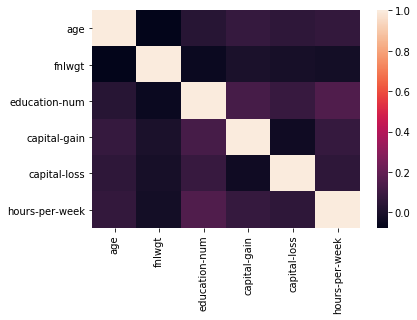

In [4]:
# show plots in the notebook
%matplotlib inline
import seaborn as sns

def distribution_categorical_variable(df, columnName):
    plt.title("Distribution of " + columnName + " column")
    df.loc[:,columnName].value_counts().plot(kind='bar')   
    plt.show()
def distribution_numerical_variable(df, columnName):
    plt.title("Distribution of " + columnName + " column")
    plt.hist(df.loc[:, columnName])
    plt.show()
    
#sns.pairplot(Adults_df, size=2.5, hue='target')
corr = Adults.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Above heat map shows that We don't have a strong correlation between data. 

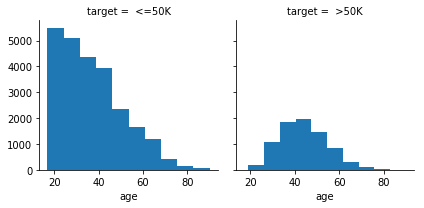

In [5]:
g = sns.FacetGrid(Adults, col="target")
g = g.map(plt.hist, "age")

From above plots we can tell that for age between 20 and 40, we have more people in class 0 (earning less than 50K)

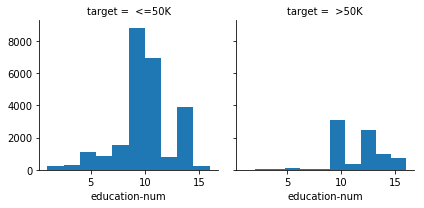

In [6]:
g = sns.FacetGrid(Adults, col="target")
g = g.map(plt.hist, "education-num")

Also, Above plots show that the education level not increasing frequency of earning more than 50K.

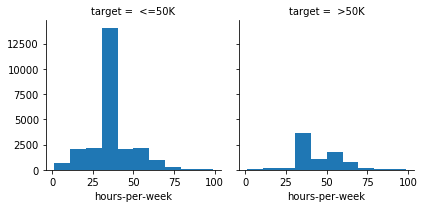

In [7]:
g = sns.FacetGrid(Adults, col="target")
g = g.map(plt.hist, "hours-per-week")

Above plots show that hours per week not increasing frequency of earning more than 50K.

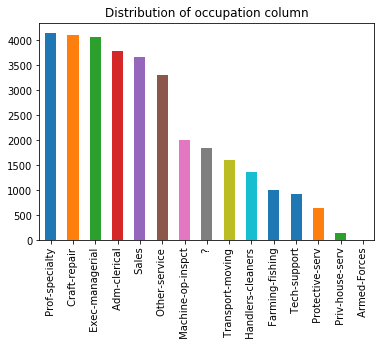

In [8]:
distribution_categorical_variable(Adults, "occupation")

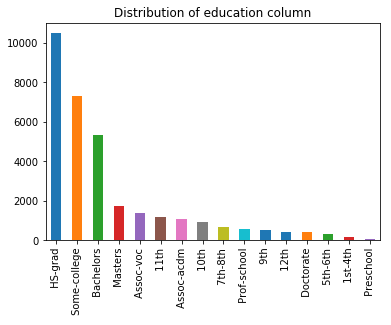

In [9]:
distribution_categorical_variable(Adults, "education")

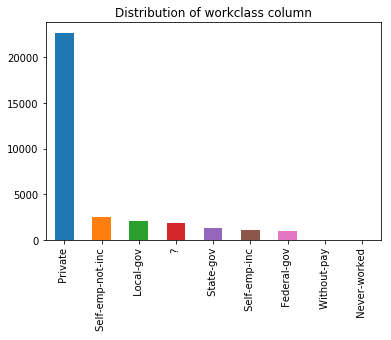

In [10]:
distribution_categorical_variable(Adults, "workclass")

## Data Pre-Processing

In [11]:
# Removing outliers and Imputing missing values for numerical variables "age", "fnlwgt", "education-num",
# "capital-gain", "capital-loss", "hours-per-week"    

replace_missing(Adults, "age")
replace_missing(Adults, "fnlwgt")
replace_missing(Adults, "education-num")
replace_missing(Adults, "capital-gain")
replace_missing(Adults, "capital-loss")
replace_missing(Adults, "hours-per-week")

account_outliers(Adults, "age")
account_outliers(Adults, "fnlwgt")
account_outliers(Adults, "education-num")
account_outliers(Adults, "capital-gain")
account_outliers(Adults, "capital-loss")
account_outliers(Adults, "hours-per-week")

# Strip whitespace
Adults['education'] = Adults["education"].map(str.strip)
Adults['workclass'] = Adults["workclass"].map(str.strip)
Adults['occupation'] = Adults["occupation"].map(str.strip)
Adults['target'] = Adults["target"].map(str.strip)

# Simplify workclass by consolidate data. 
# Missing values are imputed

Adults.loc[Adults.loc[:, "workclass"] == "?", "workclass"] = "Without-pay"
Adults.loc[Adults.loc[:, "workclass"] == "Self-emp-not-inc", "workclass"] = "Private"
Adults.loc[Adults.loc[:, "workclass"] == "Self-emp-inc", "workclass"] = "Private"
Adults.loc[Adults.loc[:, "workclass"] == "Local-gov", "workclass"] = "Federal-gov"
Adults.loc[Adults.loc[:, "workclass"] == "State-gov", "workclass"] = "Federal-gov"
Adults.loc[Adults.loc[:, "workclass"] == "Never-worked", "workclass"] = "Without-pay"
Adults.loc[Adults.loc[:, "occupation"] == "?", "occupation"] = "Other-service"

# Consolidate education levels into 3 categories, low, mid, high

Adults.loc[Adults.loc[:, "education"] == "Bachelors", "education"] = "HIGH"
Adults.loc[Adults.loc[:, "education"] == "Some-college", "education"] = "HIGH"
Adults.loc[Adults.loc[:, "education"] == "11th", "education"] = "MID"
Adults.loc[Adults.loc[:, "education"] == "HS-grad", "education"] = "MID"
Adults.loc[Adults.loc[:, "education"] == "Prof-school", "education"] = "MID"
Adults.loc[Adults.loc[:, "education"] == "Assoc-acdm", "education"] = "MID"
Adults.loc[Adults.loc[:, "education"] == "Assoc-voc", "education"] = "MID"
Adults.loc[Adults.loc[:, "education"] == "9th", "education"] = "LOW"
Adults.loc[Adults.loc[:, "education"] == "7th-8th", "education"] = "LOW"
Adults.loc[Adults.loc[:, "education"] == "12th", "education"] = "MID"
Adults.loc[Adults.loc[:, "education"] == "Masters", "education"] = "HIGH"
Adults.loc[Adults.loc[:, "education"] == "1st-4th", "education"] = "LOW"
Adults.loc[Adults.loc[:, "education"] == "Doctorate", "education"] = "HIGH"
Adults.loc[Adults.loc[:, "education"] == "10th", "education"] = "MID"
Adults.loc[Adults.loc[:, "education"] == "5th-6th", "education"] = "LOW"
Adults.loc[Adults.loc[:, "education"] == "Preschool", "education"] = "LOW"



# Consolidate occupation data
Adults.loc[Adults.loc[:, "occupation"] == "Tech-support", "occupation"] = "OfficeWork"
Adults.loc[Adults.loc[:, "occupation"] == "Craft-repair", "occupation"] = "Service"
Adults.loc[Adults.loc[:, "occupation"] == "Other-service", "occupation"] = "Service"
Adults.loc[Adults.loc[:, "occupation"] == "Exec-managerial", "occupation"] = "OfficeWork"
Adults.loc[Adults.loc[:, "occupation"] == "Prof-specialty", "occupation"] = "OfficeWork"
Adults.loc[Adults.loc[:, "occupation"] == "Handlers-cleaners", "occupation"] = "Service"
Adults.loc[Adults.loc[:, "occupation"] == "Machine-op-inspct", "occupation"] = "Service"
Adults.loc[Adults.loc[:, "occupation"] == "Adm-clerical", "occupation"] = "OfficeWork"
Adults.loc[Adults.loc[:, "occupation"] == "Farming-fishing", "occupation"] = "Service"
Adults.loc[Adults.loc[:, "occupation"] == "Transport-moving", "occupation"] = "Service"
Adults.loc[Adults.loc[:, "occupation"] == "Priv-house-serv", "occupation"] = "Service"
Adults.loc[Adults.loc[:, "occupation"] == "Protective-serv", "occupation"] = "Service"



### Encode target variables
Adults.loc[Adults.loc[:, "target"] == '<=50K', "target"] = 0
Adults.loc[Adults.loc[:, "target"] == '>50K', "target"] = 1


# One-hot encoding educational column
# Create 3 new columns, one for each category

Adults.loc[:, "LOW"] = (Adults.loc[:, "education"] == "LOW").astype(int)
Adults.loc[:, "MID"] = (Adults.loc[:, "education"] == "MID").astype(int)
Adults.loc[:, "HIGH"] = (Adults.loc[:, "education"] == "HIGH").astype(int)



# One-hot encoding work-class column
# Create 3 new columns, one for each category
Adults.loc[:, "Private"] = (Adults.loc[:, "workclass"] == "Private").astype(int)
Adults.loc[:, "Federal-gov"] = (Adults.loc[:, "workclass"] == "Federal-gov").astype(int)
Adults.loc[:, "Without-pay"] = (Adults.loc[:, "workclass"] == "Without-pay").astype(int)



# One-hot encoding occupation column
# Create 3 new columns, one for each category

Adults.loc[:, "OfficeWork"] = (Adults.loc[:, "occupation"] == "OfficeWork").astype(int)
Adults.loc[:, "Service"] = (Adults.loc[:, "occupation"] == "Service").astype(int)
Adults.loc[:, "Sales"] = (Adults.loc[:, "occupation"] == "Sales").astype(int)
Adults.loc[:, "Armed-Forces"] = (Adults.loc[:, "occupation"] == "Armed-Forces").astype(int)


# Remove obsolete columns

Adults = Adults.drop("education", axis=1)
Adults = Adults.drop("workclass", axis=1)
Adults = Adults.drop("occupation", axis=1)

#print (Adults.head())

Adults.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,...,LOW,MID,HIGH,Private,Federal-gov,Without-pay,OfficeWork,Service,Sales,Armed-Forces
0,39.0,77516.0,13.0,Never-married,Not-in-family,White,Male,2174.0,0.0,40.0,...,0,0,1,0,1,0,1,0,0,0
1,50.0,83311.0,13.0,Married-civ-spouse,Husband,White,Male,0.0,0.0,40.0,...,0,0,1,1,0,0,1,0,0,0
2,38.0,215646.0,9.0,Divorced,Not-in-family,White,Male,0.0,0.0,40.0,...,0,1,0,1,0,0,0,1,0,0
3,53.0,234721.0,7.0,Married-civ-spouse,Husband,Black,Male,0.0,0.0,40.0,...,0,1,0,1,0,0,0,1,0,0
4,28.0,338409.0,13.0,Married-civ-spouse,Wife,Black,Female,0.0,0.0,40.0,...,0,0,1,1,0,0,1,0,0,0
5,37.0,284582.0,14.0,Married-civ-spouse,Wife,White,Female,0.0,0.0,40.0,...,0,0,1,1,0,0,1,0,0,0
6,49.0,160187.0,5.0,Married-spouse-absent,Not-in-family,Black,Female,0.0,0.0,16.0,...,1,0,0,1,0,0,0,1,0,0
7,52.0,209642.0,9.0,Married-civ-spouse,Husband,White,Male,0.0,0.0,45.0,...,0,1,0,1,0,0,1,0,0,0
8,31.0,45781.0,14.0,Never-married,Not-in-family,White,Female,14084.0,0.0,50.0,...,0,0,1,1,0,0,1,0,0,0
9,42.0,159449.0,13.0,Married-civ-spouse,Husband,White,Male,5178.0,0.0,40.0,...,0,0,1,1,0,0,1,0,0,0


## Unsupervised Learning

In [12]:
# Run Kmeans on the age column, and split into 4 buckets by age

columnAge = Adults.loc[:, "age"]
# Normalize attributes prior to K-Means

min = columnAge.min()
max = columnAge.max()

if max == 0:
    raise Exception("no max")
mid = (min + max) / 2



columnAge = columnAge.subtract(min).divide(max-min)
reshapedAge = np.reshape(columnAge.values, (-1, 1))
kmeans = KMeans(n_clusters=4).fit(reshapedAge)
labels_df = pd.DataFrame(kmeans.labels_)

# Adding cluster label to the data set to be used in supervised learning
Adults['age-val'] = labels_df.values

Adults.head(5)
#print(Adults.dtypes)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,...,MID,HIGH,Private,Federal-gov,Without-pay,OfficeWork,Service,Sales,Armed-Forces,age-val
0,39.0,77516.0,13.0,Never-married,Not-in-family,White,Male,2174.0,0.0,40.0,...,0,1,0,1,0,1,0,0,0,0
1,50.0,83311.0,13.0,Married-civ-spouse,Husband,White,Male,0.0,0.0,40.0,...,0,1,1,0,0,1,0,0,0,3
2,38.0,215646.0,9.0,Divorced,Not-in-family,White,Male,0.0,0.0,40.0,...,1,0,1,0,0,0,1,0,0,0
3,53.0,234721.0,7.0,Married-civ-spouse,Husband,Black,Male,0.0,0.0,40.0,...,1,0,1,0,0,0,1,0,0,1
4,28.0,338409.0,13.0,Married-civ-spouse,Wife,Black,Female,0.0,0.0,40.0,...,0,1,1,0,0,1,0,0,0,2


## Supervised Learning

In [13]:
# Select only feature columns and target column for classification

Adults = Adults[['age-val', 'LOW', 'MID', 'HIGH','Private', 'Federal-gov', 'Without-pay', 
                 'OfficeWork', 'Service','Sales','Armed-Forces','hours-per-week',
                  'capital-gain', 'capital-loss', 'target']]

# Split data into training and testing data set
TestFraction = 0.3
print ("Test fraction is chosen to be:", TestFraction)

Test fraction is chosen to be: 0.3


In [14]:
Target = "target"
Inputs = list(Adults.columns)
Inputs.remove(Target)
#print(Inputs)
target_label = 'target'
feature_labels = [x for x in Adults.columns if x not in [target_label]]

# Scale the X-matrix
from sklearn.preprocessing import StandardScaler
# Standardizing the features
X = Adults.as_matrix(columns=feature_labels)
#print(X)
X_scaled = StandardScaler().fit_transform(X)
#print(X_scaled)
Data = pd.DataFrame(data = X_scaled,
             columns = feature_labels)

FinalData = pd.concat([Adults[target_label], Data], axis = 1)
#print(FinalData)

# Spliting data into training and testing
TrainSet, TestSet = train_test_split(FinalData, test_size=TestFraction)

C:\Users\Ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


###  LogisticRegression Classifier 

Probability Threshold is chosen to be: 0.5

Confusion Matrix and Metrics for LogisticRegression:
TP, TN, FP, FN: 542 , 7140 , 264 , 1823
Accuracy rate for LogisticRegression: 0.79
Precision for LogisticRegression: 0.67
Recall for LogisticRegression: 0.23


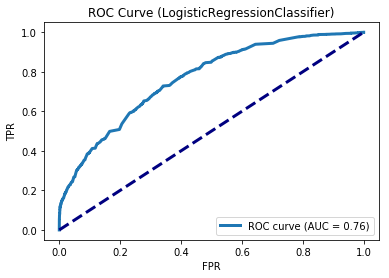

In [15]:
Threshold = 0.5 # Some number between 0 and 1

print ("Probability Threshold is chosen to be:", Threshold)

clf = LogisticRegression() # default parameters are fine

clf.fit(TrainSet.loc[:,Inputs], TrainSet.loc[:,Target])
BothProbabilities = clf.predict_proba(TestSet.loc[:,Inputs]) 
# we have probabilities of been 0 and been 1, and we are only interested in been 1

probabilities = BothProbabilities[:,1]

print ('\nConfusion Matrix and Metrics for LogisticRegression:')

predictions = (probabilities > Threshold).astype(int)

CM_LogisticRegression = confusion_matrix(TestSet.loc[:,Target], predictions)

tn, fp, fn, tp = CM_LogisticRegression.ravel()

print ("TP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)

AR_LogisticRegression = accuracy_score(TestSet.loc[:,Target], predictions)

print ("Accuracy rate for LogisticRegression:", np.round(AR_LogisticRegression, 2))

P_LogisticRegression = precision_score(TestSet.loc[:,Target], predictions)

print ("Precision for LogisticRegression:", np.round(P_LogisticRegression, 2))

R_LogisticRegression = recall_score(TestSet.loc[:,Target], predictions)

print ("Recall for LogisticRegression:", np.round(R_LogisticRegression, 2))

fpr, tpr, th = roc_curve(TestSet.loc[:,Target], probabilities)

AUC = auc(fpr, tpr)

# ROC Curve LogisticRegression ################################################################################
plt.figure()
plt.title('ROC Curve (LogisticRegressionClassifier)')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier

plt.legend(loc="lower right")

plt.show()

### RandomForest Classifier


Confusion Matrix and Metrics for RandomForestClassifier:
TP, TN, FP, FN: 854 , 6973 , 431 , 1511
Accuracy rate for RandomForest: 0.8
Precision for RandomForest: 0.66
Recall for RandomForest: 0.36


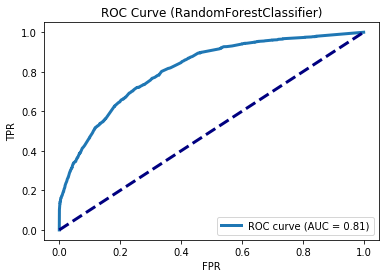

In [16]:
clf1 = RandomForestClassifier() # default parameters are fine
clf1.fit(TrainSet.loc[:,Inputs], TrainSet.loc[:,Target])

BothProbabilities1 = clf1.predict_proba(TestSet.loc[:,Inputs]) 

# // we have probabilities of been 0 and been 1, and we are only interested in been 1
probabilities1 = BothProbabilities1[:,1]

print ('\nConfusion Matrix and Metrics for RandomForestClassifier:')
predictions1 = (probabilities1 > Threshold).astype(int)
CM_RandomForest = confusion_matrix(TestSet.loc[:,Target], predictions1)

tn, fp, fn, tp = CM_RandomForest.ravel()

print ("TP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)

AR_RandomForest = accuracy_score(TestSet.loc[:,Target], predictions1)

print ("Accuracy rate for RandomForest:", np.round(AR_RandomForest, 2))

P_RandomForest = precision_score(TestSet.loc[:,Target], predictions1)

print ("Precision for RandomForest:", np.round(P_RandomForest, 2))

R_RandomForest = recall_score(TestSet.loc[:,Target], predictions1)

print ("Recall for RandomForest:", np.round(R_RandomForest, 2))


 # False Positive Rate, True Posisive Rate, probability thresholds

fpr1, tpr1, th1 = roc_curve(TestSet.loc[:,Target], probabilities1)

AUC1 = auc(fpr1, tpr1)

plt.figure()

plt.title('ROC Curve (RandomForestClassifier)')

plt.xlabel('FPR')

plt.ylabel('TPR')

plt.plot(fpr1, tpr1, LW=3, label='ROC curve (AUC = %0.2f)' % AUC1)

plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier

plt.legend(loc="lower right")

plt.show()